1. Make the 2/4-1 Neurel Network using a sigmoid function --- complete
2. use the best nepoch and alhpa pair from the previous excersice


3. run it 50 times and count the nsucess that gives error <0.05
4. do same step as above for 2/4-1 with rectinlear
5. make a plot of the rectinlear function and sigmoid n sucess vs iteration
6. submit sigmoid code and plot


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits. mplot3d import Axes3D
import math



def NN241_sigmoud(learningrate,epoch,iterations):
    #######################   P a r a b o l i c  c l u s t e r s      ###########################
  #####################   S y n t h e t i c  Data C r e a t i o n     #########################

  nData=2000
  nTrain =1000
  nEpoch=epoch # number of training points
  nTest = 2000
  alpha =learningrate #(learning rate)

  std=0.5
  x=np.zeros((2*nData,2))
  t=np.zeros((2*nData))
  r=np.random.normal(0,std,2*nData)
  the=2*np.pi*np.random.rand(2*nData)

  # w11f=np.zeros(nEpoch*nTrain)
  # w12f=np.zeros(nEpoch*nTrain)



  #cluster 1
  h=-6+12*np.random.rand(nData)
  v=5+(h**2)/6
  x[0:nData,0]=h + r[0:nData]*np.cos(the[0:nData])
  x[0:nData,1]=v + r[0:nData]*np.sin(the[0:nData])
  t[0:nData]=0

  #Cluster 2
  h=-5+10*np.random.rand(nData)
  v=10+(h**2)/4
  x[nData:2*nData,0]=h + r[nData:2*nData]*np.cos(the[nData:2*nData])
  x[nData:2*nData,1]=v + r[nData:2*nData]*np.sin(the[nData:2*nData])
  t[nData:2*nData]=1

  #######################  Normalization   ################################
  x[:,0]=1 + 0.1*x[:,0]
  x[:,1]=1 + 0.1*x[:,1]
  nSuccess=0
  plott=[]
  for i in range(iterations):
    ################# Parameter Intialization    ############################
    #########################################################################

    w11=0.5-np.random.rand(); w12=0.5-np.random.rand()
    w21=0.5-np.random.rand(); w22=0.5-np.random.rand()

    w31=0.5-np.random.rand(); w32=0.5-np.random.rand()
    w41=0.5-np.random.rand(); w42=0.5-np.random.rand()


    b2=0.5-np.random.rand(); b1=0.5-np.random.rand()
    b4=0.5-np.random.rand(); b3=0.5-np.random.rand()

    ww1=0.5-np.random.rand(); ww2=0.5-np.random.rand()
    ww3=0.5-np.random.rand(); ww4=0.5-np.random.rand()

    bb=0.5-np.random.rand()

    a=range(0,2*nData)
    sp=random.sample(a,nTrain+nTest) # indexes for random selection of data fo
                                    #  training and testing

    #Training

    for epoch in range(0,nEpoch):
      for i in range(0,nTrain):
        #--------------------------------------------------------- Calculating the error so we can update ---------------------------------------------------------
        y1=b1+w11*x[sp[i],0]+w12*x[sp[i],1]
        y2=b2+w21*x[sp[i],0]+w22*x[sp[i],1]
        y3=b3+w31*x[sp[i],0]+w32*x[sp[i],1]
        y4=b4+w41*x[sp[i],0]+w42*x[sp[i],1]

        # this is where the sigmoid function comes
        #dxx1 = derivative of [xxx1=f(y1)] -> xxx1=sigmoid(y1) --> derivative = e^-z/(1+e^-z)^2

        # E^*(-Y)
        y1f=(math.exp(-y1))
        y2f=(math.exp(-y2))
        y3f=(math.exp(-y3))
        y4f=(math.exp(-y4))

        #DERIVATIVE OF THE SIGMOID FUNCTION
        dxx1=y1f/((1+y1f)**2)
        dxx2=y2f/((1+y2f)**2)
        dxx3=y3f/((1+y3f)**2)
        dxx4=y4f/((1+y4f)**2)

        #xx1=1/(1+y1f);xx2=1/(1+y2f); xx3=1/(1+y3f);xx4=1/(1+y4f)
        xx1=dxx1*y1
        xx2=dxx2*y2
        xx3=dxx3*y3
        xx4=dxx4*y4
        yy= xx1*ww1 + xx2*ww2 + xx3*ww3 + xx4*ww4 + bb
        yy=yy>0
        e=t[sp[i]]-yy
    #--------------------------------------------------------- ---------------------------------------------------------



        #updates -- back prop algo -- use derivatives and update rule
        ww1=ww1 + alpha*e*xx1
        ww2=ww2 + alpha*e*xx2
        ww3=ww3 + alpha*e*xx3
        ww4=ww4 + alpha*e*xx4
        bb=bb + alpha*e

        w11=w11 + alpha*e*ww1*dxx1*x[sp[i],0]
        w12=w12 + alpha*e*ww1*dxx1*x[sp[i],1]
        w21=w21 + alpha*e*ww2*dxx2*x[sp[i],0]
        w22=w22 + alpha*e*ww2*dxx2*x[sp[i],1]
        w31=w31 + alpha*e*ww3*dxx3*x[sp[i],0]
        w32=w32 + alpha*e*ww3*dxx3*x[sp[i],1]
        w41=w41 + alpha*e*ww4*dxx4*x[sp[i],0]
        w42=w42 + alpha*e*ww4*dxx4*x[sp[i],1]

        b1=b1 + alpha*e*ww1*dxx1
        b2=b2 + alpha*e*ww2*dxx2
        b3=b3 + alpha*e*ww3*dxx3
        b4=b4 + alpha*e*ww4*dxx4

    #testing

    er=0
    for i in range(nTrain,nTrain+nTest):
        y1 = b1 + w11*x[sp[i],0] + w12*x[sp[i],1]
        y2 = b2 + w21*x[sp[i],0] + w22*x[sp[i],1]
        y3=  b3 + w31*x[sp[i],0]+w32*x[sp[i],1]
        y4=  b4 + w41*x[sp[i],0]+w42*x[sp[i],1]

        y1f=(math.exp(-y1))
        y2f=(math.exp(-y2))
        y3f=(math.exp(-y3))
        y4f=(math.exp(-y4))

        #xx1=1/(1+y1f);xx2=1/(1+y2f); xx3=1/(1+y3f);xx4=1/(1+y4f)

        dxx1=y1f/((1+y1f)**2)
        dxx2=y2f/((1+y2f)**2)
        dxx3=y3f/((1+y3f)**2)
        dxx4=y4f/((1+y4f)**2)

        xx1=dxx1*y1
        xx2=dxx2*y2
        xx3=dxx3*y3
        xx4=dxx4*y4

        yy= xx1*ww1 + xx2*ww2 + xx3*ww3 + xx4*ww4 + bb
        yy=yy>0 # this is what is actually doing the splitting of the output. this will make anything less than a zero output a false (ie a zero) and anything greater than zero a true(ie. a one)
        e = abs(t[sp[i]] - yy)
        er=er+e
    er=er/nTest
    #print(er)
    if er<0.05:
      nSuccess=nSuccess+1
      plott.append(nSuccess)
    else:
      plott.append(nSuccess)
  return(plott,nSuccess)

    #print(er)

In [ ]:
#Rectalinear function

import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits. mplot3d import Axes3D

def NN241_rect(learningrate,epoch,iterations):
  nData=2000
  nTrain =1000
  nEpoch=epoch # number of training points
  nTest = 2000
  alpha =learningrate #(learning rate)
  std=0.5
  x=np.zeros((2*nData,2))
  t=np.zeros((2*nData))
  r=np.random.normal(0,std,2*nData)
  the=2*np.pi*np.random.rand(2*nData)
  # w11f=np.zeros(nEpoch*nTrain)
  # w12f=np.zeros(nEpoch*nTrain)
  #cluster 1
  h=-6+12*np.random.rand(nData)
  v=5+(h**2)/6
  x[0:nData,0]=h + r[0:nData]*np.cos(the[0:nData])
  x[0:nData,1]=v + r[0:nData]*np.sin(the[0:nData])
  t[0:nData]=0
  #Cluster 2
  h=-5+10*np.random.rand(nData)
  v=10+(h**2)/4
  x[nData:2*nData,0]=h + r[nData:2*nData]*np.cos(the[nData:2*nData])
  x[nData:2*nData,1]=v + r[nData:2*nData]*np.sin(the[nData:2*nData])
  t[nData:2*nData]=1
  x[:,0]=1 + 0.1*x[:,0]
  x[:,1]=1 + 0.1*x[:,1]
  plott=[]
  for i in range(iterations):
    w11=0.5-np.random.rand(); w12=0.5-np.random.rand()
    w21=0.5-np.random.rand(); w22=0.5-np.random.rand()
    w31=0.5-np.random.rand(); w32=0.5-np.random.rand()
    w41=0.5-np.random.rand(); w42=0.5-np.random.rand()
    b2=0.5-np.random.rand(); b1=0.5-np.random.rand()
    b4=0.5-np.random.rand(); b3=0.5-np.random.rand()
    ww1=0.5-np.random.rand(); ww2=0.5-np.random.rand()
    ww3=0.5-np.random.rand(); ww4=0.5-np.random.rand()
    bb=0.5-np.random.rand()
    a=range(0,2*nData)
    sp=random.sample(a,nTrain+nTest)
    nSuccess=0

    for epoch in range(0,nEpoch):
      for i in range(0,nTrain):
        y1=b1+w11*x[sp[i],0]+w12*x[sp[i],1]
        y2=b2+w21*x[sp[i],0]+w22*x[sp[i],1]
        y3=b3+w31*x[sp[i],0]+w32*x[sp[i],1]
        y4=b4+w41*x[sp[i],0]+w42*x[sp[i],1]
        dxx1=y1>0; dxx2=y2>0; dxx3=y3>0; dxx4=y4>0 # this is the rectalinear function
        xx1=dxx1*y1;xx2=dxx2*y2; xx3=dxx3*y3;xx4=dxx4*y4
        yy= xx1*ww1 + xx2*ww2 + xx3*ww3 + xx4*ww4 + bb
        yy=yy>0
        e=t[sp[i]]-yy
        #updates -- back prop algo -- use derivatives and update rule
        ww1=ww1 + alpha*e*xx1; ww2=ww2 + alpha*e*xx2;
        ww3=ww3 + alpha*e*xx3; ww4=ww4 + alpha*e*xx4;
        bb=bb + alpha*e
        w11=w11 + alpha*e*ww1*dxx1*x[sp[i],0]
        w12=w12 + alpha*e*ww1*dxx1*x[sp[i],1]
        w21=w21 + alpha*e*ww2*dxx2*x[sp[i],0]
        w22=w22 + alpha*e*ww2*dxx2*x[sp[i],1]
        w31=w31 + alpha*e*ww3*dxx3*x[sp[i],0]
        w32=w32 + alpha*e*ww3*dxx3*x[sp[i],1]
        w41=w41 + alpha*e*ww4*dxx4*x[sp[i],0]
        w42=w42 + alpha*e*ww4*dxx4*x[sp[i],1]
        b1=b1 + alpha*e*ww1*dxx1;  b2=b2 + alpha*e*ww2*dxx2
        b3=b3 + alpha*e*ww3*dxx3;  b4=b4 + alpha*e*ww4*dxx4
    er=0
    for i in range(nTrain,nTrain+nTest):
        y1 = b1 + w11*x[sp[i],0] + w12*x[sp[i],1]
        y2 = b2 + w21*x[sp[i],0] + w22*x[sp[i],1]
        y3=b3+w31*x[sp[i],0]+w32*x[sp[i],1]
        y4=b4+w41*x[sp[i],0]+w42*x[sp[i],1]
        dxx1=y1>0; dxx2=y2>0; dxx3=y3>0; dxx4=y4>0
        xx1=dxx1*y1;xx2=dxx2*y2; xx3=dxx3*y3;xx4=dxx4*y4

        yy= xx1*ww1 + xx2*ww2 + xx3*ww3 + xx4*ww4 + bb
        yy=yy>0
        e = abs(t[sp[i]] - yy)
        er=er+e
    er=er/nTest
    #print(er)
    if er<0.05:
      nSuccess=nSuccess+1
      plott.append(nSuccess)
    else:
      plott.append(nSuccess)

  return(plott,nSuccess)


4
3


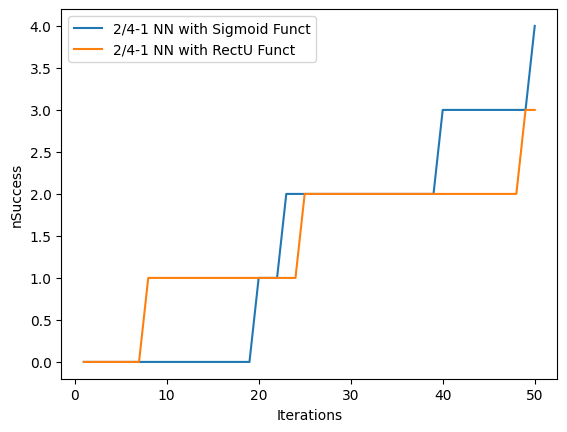

In [ ]:
#RUN SIGMOID CODE FOR BEST ALPHA AND EPOCH, FOR 50 ITERATIONS - SAVE THE NSUCESS IN AN ARRAY
#DO SAME AS ABOVE FOR RECTILINEAR FUNCTION AND SAVE THE NSUCESS IN AN ARRAY
#PLOT THE TWO AGAINST THE ITERATIONS

#I will be using a epoch =3 and learning rate of 0.008
xaxis= range(1,51)

#SIGMOID RUN
sig,nSUCC_sig=NN241_sigmoud(0.006,3,50)
plt.plot(xaxis,sig, label='2/4-1 NN with Sigmoid Funct')
print(nSUCC_sig)
#Rectalineaer Function
react,nSUCC_react=NN241_sigmoud(0.006,3,50)
plt.plot(xaxis,react, label='2/4-1 NN with RectU Funct')
print(nSUCC_react)

#plotting both lines
plt.xlabel('Iterations')
plt.ylabel('nSuccess')
plt.legend()
plt.show()


In [ ]:
if 0.0045<0.05:
  print(1)

1
